# FRAUD - 2 : Example Dependent Cost Sensitive Classificatio
Team Members :
* Sanskriti Agarwal - CS24MTECH14002
* Kocherla Sai Kiran - AI24MTECH02003
* Kota Dhana Lakshmi - AI22BTECH11012

###  Data Loading and Preprocessing

This cell performs the following steps:

1. **Imports necessary libraries**:  
   Uses `numpy`, `pandas`, and `scikit-learn` modules for data handling, preprocessing, and model evaluation.

2. **Defines utility functions**:
   - `add_intercept(X)`: Appends a bias (intercept) term to the feature matrix.
   - `total_cost(...)`: Computes the total misclassification cost with:
     - False Positive cost = 3  
     - True Positive cost = 3  
     - False Negative cost = instance-specific (provided in dataset)

3. **Loads the dataset**:
   - Reads a CSV file containing features, labels, and false negative costs.
   - Extracts:  
     - $\mathbf{X}$: Feature matrix (columns 0–10)  
     - $y$: Binary labels (column 11)  
     - FNC: False Negative Costs (column 12)

4. **Preprocesses the data**:
   - Applies `StandardScaler` for normalization (zero mean, unit variance).
   - Splits data into training and testing sets using an 80/20 split with stratified sampling.

5. **Prepares inputs for linear models**:
   - Adds an intercept term to both training and test feature matrices.

$$
\text{Training samples} = N_{\text{train}}, \quad \text{Testing samples} = N_{\text{test}}
$$

The output confirms successful loading and preprocessing of the dataset.


In [1]:
# =============================================================================
# Cell 1: Central Utilities and Data Loading
# =============================================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Utility functions
def add_intercept(X):
    return np.hstack([X, np.ones((X.shape[0], 1))])

def total_cost(y_true, y_pred, fn_costs):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    TP = (y_true == 1) & (y_pred == 1)
    FP = (y_true == 0) & (y_pred == 1)
    FN = (y_true == 1) & (y_pred == 0)
    # Constants: true positive cost = 3, false positive cost = 3
    return FP.sum() * 3 + np.sum(fn_costs[FN]) + TP.sum() * 3

# Load and preprocess data
data = pd.read_csv('/content/costsensitiveregression - costsensitiveregression.csv')
X = data.iloc[:, 0:11].values            # Features (columns 0-10)
y = data.iloc[:, 11].values.astype(int)   # Label (column 11)
FNC = data.iloc[:, 12].values             # Instance-specific false negative cost (column 12)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, FNC_train, FNC_test = train_test_split(
    X_scaled, y, FNC, test_size=0.2, random_state=42, stratify=y
)
X_train_int = add_intercept(X_train)
X_test_int  = add_intercept(X_test)

print("Data Loaded: Training samples =", X_train.shape[0], "Testing samples =", X_test.shape[0])


Data Loaded: Training samples = 118108 Testing samples = 29528


###  Standard Logistic Regression with Cost Evaluation

This cell trains a **standard logistic regression model** (using Scikit-learn) and evaluates its performance over a range of probability thresholds.

#### Key Steps:

1. **Model Training**:
   - Logistic regression is trained using the `lbfgs` solver with `max_iter = 500` on the training data.

2. **Threshold-based Evaluation**:
   - For each threshold $t \in [0.00, 1.00]$ (in steps of 0.02):
     - Predict labels: $\hat{y} = \mathbb{1}[\text{P}(y=1 \mid x) \geq t]$
     - Compute **average cost** on both training and test sets using the `total_cost()` function.
     - Store and print the costs for each threshold.

3. **Visualization**:
   - Plots the **average cost** (y-axis) versus **threshold** (x-axis) for both training and test data.
   - Helps identify the threshold that minimizes cost, which may not be the default 0.5 in cost-sensitive settings.

This analysis highlights how varying the classification threshold affects overall cost, particularly in cases with instance-specific false negative penalties.


==== Standard Logistic Regression Average Costs ====
Cutoff=0.00 | Avg Train Cost=3.0000 | Avg Test Cost=3.0000
Cutoff=0.05 | Avg Train Cost=5.8349 | Avg Test Cost=2.8586
Cutoff=0.10 | Avg Train Cost=10.3119 | Avg Test Cost=9.1642
Cutoff=0.15 | Avg Train Cost=13.3681 | Avg Test Cost=13.9590
Cutoff=0.20 | Avg Train Cost=15.6748 | Avg Test Cost=15.3772
Cutoff=0.25 | Avg Train Cost=19.1987 | Avg Test Cost=16.6687
Cutoff=0.30 | Avg Train Cost=21.9585 | Avg Test Cost=18.5315
Cutoff=0.35 | Avg Train Cost=23.5304 | Avg Test Cost=20.5976
Cutoff=0.40 | Avg Train Cost=25.5537 | Avg Test Cost=22.1414
Cutoff=0.45 | Avg Train Cost=27.7640 | Avg Test Cost=24.7902
Cutoff=0.50 | Avg Train Cost=30.0796 | Avg Test Cost=27.3307
Cutoff=0.55 | Avg Train Cost=33.9570 | Avg Test Cost=29.0564
Cutoff=0.60 | Avg Train Cost=37.0059 | Avg Test Cost=31.9705
Cutoff=0.65 | Avg Train Cost=40.4763 | Avg Test Cost=35.0580
Cutoff=0.70 | Avg Train Cost=44.3583 | Avg Test Cost=38.1136
Cutoff=0.75 | Avg Train Cost=49.5978 

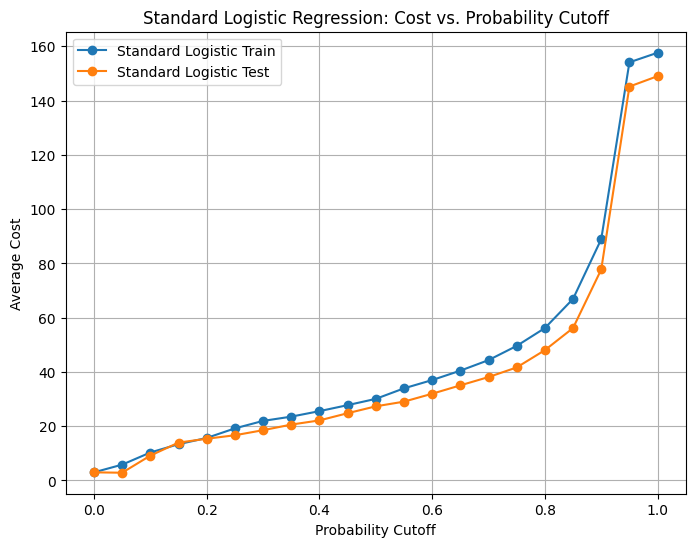

==== Standard Logistic Regression Average Costs ====
Cutoff=0.01 | Avg Train Cost=5.9043 | Avg Test Cost=3.1958
Cutoff=0.06 | Avg Train Cost=6.8258 | Avg Test Cost=3.1238
Cutoff=0.11 | Avg Train Cost=10.7153 | Avg Test Cost=9.6597
Cutoff=0.16 | Avg Train Cost=13.8324 | Avg Test Cost=14.1229
Cutoff=0.21 | Avg Train Cost=15.8964 | Avg Test Cost=15.4008
Cutoff=0.26 | Avg Train Cost=19.3267 | Avg Test Cost=17.0400
Cutoff=0.30 | Avg Train Cost=22.1141 | Avg Test Cost=18.7620
Cutoff=0.35 | Avg Train Cost=23.7997 | Avg Test Cost=20.7789
Cutoff=0.40 | Avg Train Cost=25.9052 | Avg Test Cost=22.2712
Cutoff=0.45 | Avg Train Cost=27.8880 | Avg Test Cost=24.8830
Cutoff=0.50 | Avg Train Cost=30.0796 | Avg Test Cost=27.3307
Cutoff=0.55 | Avg Train Cost=33.9278 | Avg Test Cost=29.0558
Cutoff=0.60 | Avg Train Cost=36.7708 | Avg Test Cost=31.8412
Cutoff=0.65 | Avg Train Cost=40.3426 | Avg Test Cost=35.0375
Cutoff=0.70 | Avg Train Cost=43.6947 | Avg Test Cost=37.6113
Cutoff=0.74 | Avg Train Cost=48.8555 

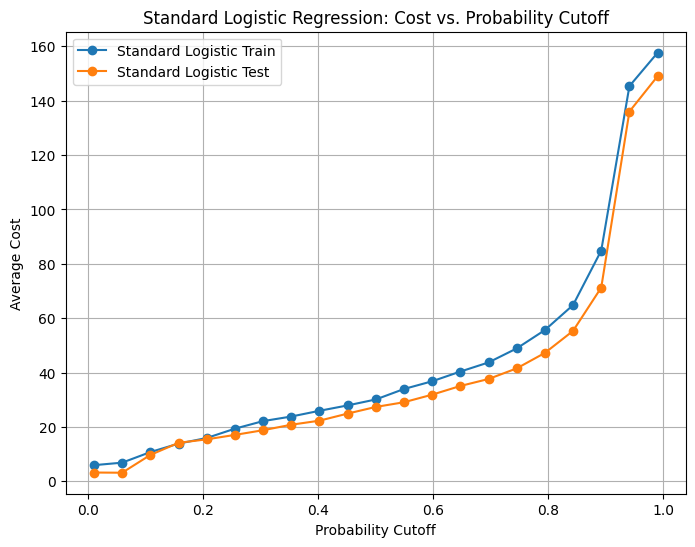

In [ ]:
# =============================================================================
# Cell 2: Standard Logistic Regression (with Average Costs)
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Train Standard Logistic Regression (using scikit-learn)
model_std = LogisticRegression(solver='lbfgs', max_iter=500)
model_std.fit(X_train, y_train)

# Evaluate over a range of thresholds and print step-by-step average costs
thresholds = np.linspace(0, 1, 21)  # 0.00, 0.02, ..., 1.00
print("==== Standard Logistic Regression Average Costs ====")
std_train_costs = []
std_test_costs = []
for cutoff in thresholds:
    y_train_pred = (model_std.predict_proba(X_train)[:, 1] >= cutoff).astype(int)
    y_test_pred  = (model_std.predict_proba(X_test)[:, 1] >= cutoff).astype(int)
    # print (y_test_pred)
    cost_train = total_cost(y_train, y_train_pred, FNC_train) / len(y_train)
    cost_test  = total_cost(y_test, y_test_pred, FNC_test) / len(y_test)
    std_train_costs.append(cost_train)
    std_test_costs.append(cost_test)
    print(f"Cutoff={cutoff:.2f} | Avg Train Cost={cost_train:.4f} | Avg Test Cost={cost_test:.4f}")

# Plot threshold-based cost curves
plt.figure(figsize=(8,6))
plt.plot(thresholds, std_train_costs, label='Standard Logistic Train', marker='o')
plt.plot(thresholds, std_test_costs, label='Standard Logistic Test', marker='o')
plt.xlabel("Probability Cutoff")
plt.ylabel("Average Cost")
plt.title("Standard Logistic Regression: Cost vs. Probability Cutoff")
plt.legend()
plt.grid(True)
plt.show()



thresholds = np.linspace(0.01, 0.99, 21)  # 0.00, 0.02, ..., 1.00
print("==== Standard Logistic Regression Average Costs ====")
std_train_costs = []
std_test_costs = []
for cutoff in thresholds:
    y_train_pred = (model_std.predict_proba(X_train)[:, 1] >= cutoff).astype(int)
    y_test_pred  = (model_std.predict_proba(X_test)[:, 1] >= cutoff).astype(int)
    # print (y_test_pred)
    cost_train = total_cost(y_train, y_train_pred, FNC_train) / len(y_train)
    cost_test  = total_cost(y_test, y_test_pred, FNC_test) / len(y_test)
    std_train_costs.append(cost_train)
    std_test_costs.append(cost_test)
    print(f"Cutoff={cutoff:.2f} | Avg Train Cost={cost_train:.4f} | Avg Test Cost={cost_test:.4f}")

# Plot threshold-based cost curves
plt.figure(figsize=(8,6))
plt.plot(thresholds, std_train_costs, label='Standard Logistic Train', marker='o')
plt.plot(thresholds, std_test_costs, label='Standard Logistic Test', marker='o')
plt.xlabel("Probability Cutoff")
plt.ylabel("Average Cost")
plt.title("Standard Logistic Regression: Cost vs. Probability Cutoff")
plt.legend()
plt.grid(True)
plt.show()


Optimal Threshold =0.05 | Avg Train Cost=5.8349 | Avg Test Cost=2.8586

###  Custom Bahnsen Cost-Sensitive Classifier (Gradient Descent Implementation)

This cell defines and trains a **custom cost-sensitive logistic regression model** using gradient descent, based on the **Bahnsen et al. cost function**. It evaluates average misclassification cost across different probability thresholds.

####  Class Details:

- Implements a logistic regression classifier (`BahnsenCostSensitiveClassifier`) optimized with **gradient descent**.
- The loss function integrates instance-level False Negative Costs ($\text{FNC}_i$) and fixed costs for other outcomes:
  - TPC (True Positive Cost) = 3  
  - FPC (False Positive Cost) = 3  
  - TNC (True Negative Cost) = 0

####  Cost Function:

The custom objective minimized during training is:

$$
\text{Cost} = \frac{1}{n} \sum_{i=1}^n \left(
y_i \left( \hat{p}_i \cdot \text{TPC} + (1 - \hat{p}_i) \cdot \text{FNC}_i \right) +
(1 - y_i) \left( \hat{p}_i \cdot \text{FPC} + (1 - \hat{p}_i) \cdot \text{TNC} \right)
\right)
$$

Where:
- $y_i$ is the true label for instance $i$  
- $\hat{p}_i = \sigma(\boldsymbol{x}_i^\top \boldsymbol{\theta})$ is the predicted probability  
- Instance-specific $\text{FNC}_i$ is used for penalizing false negatives

####  Training:
- Trained using **gradient descent** for 2000 epochs with learning rate $\alpha = 0.01$
- Weight updates are computed using the gradient of the cost function with respect to parameters $\boldsymbol{w}, b$

####  Evaluation 1: Thresholds from 0 to 1
- Evaluates average train/test cost for 21 evenly spaced cutoffs from $0.00$ to $1.00$
- Helps identify the **best cost-effective threshold**

####  Evaluation 2: Thresholds from 0 to 0.9
- Repeats evaluation on a narrower range ($0.00$ to $0.99$) for finer-grained threshold tuning
- Useful when optimal cutoff lies in the lower threshold region (common in imbalanced or cost-sensitive cases)

####  Visualization:
- Both evaluations are visualized with **Cost vs. Probability Cutoff** plots for training and testing data.
- These plots help understand how the model responds to different decision thresholds under cost-sensitive settings.

This approach offers complete control over the training process and cost function, and is suitable for experimenting with custom penalties in critical classification problems.


==== Custom Bahnsen Average Costs (Thresholds 0 to 1) ====
Cutoff=0.00 | Avg Train Cost=3.0000 | Avg Test Cost=3.0000
Cutoff=0.05 | Avg Train Cost=2.3995 | Avg Test Cost=2.3851
Cutoff=0.10 | Avg Train Cost=2.2125 | Avg Test Cost=2.2154
Cutoff=0.15 | Avg Train Cost=2.1176 | Avg Test Cost=2.1217
Cutoff=0.20 | Avg Train Cost=2.0816 | Avg Test Cost=2.1051
Cutoff=0.25 | Avg Train Cost=2.0297 | Avg Test Cost=2.0799
Cutoff=0.30 | Avg Train Cost=2.0230 | Avg Test Cost=2.0765
Cutoff=0.35 | Avg Train Cost=2.0060 | Avg Test Cost=2.0461
Cutoff=0.40 | Avg Train Cost=1.9902 | Avg Test Cost=2.0428
Cutoff=0.45 | Avg Train Cost=1.9891 | Avg Test Cost=2.0451
Cutoff=0.50 | Avg Train Cost=1.9902 | Avg Test Cost=2.0393
Cutoff=0.55 | Avg Train Cost=1.9980 | Avg Test Cost=2.0528
Cutoff=0.60 | Avg Train Cost=2.0075 | Avg Test Cost=2.0573
Cutoff=0.65 | Avg Train Cost=2.0212 | Avg Test Cost=2.0799
Cutoff=0.70 | Avg Train Cost=2.0466 | Avg Test Cost=2.0971
Cutoff=0.75 | Avg Train Cost=2.0778 | Avg Test Cost=2.14

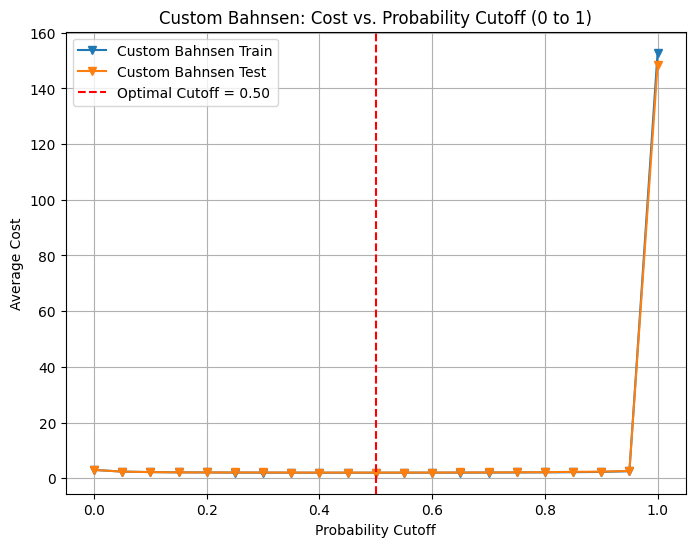


==== Custom Bahnsen Average Costs (Thresholds 0 to 0.99) ====
Cutoff=0.00 | Avg Train Cost=3.0000 | Avg Test Cost=3.0000
Cutoff=0.05 | Avg Train Cost=2.4017 | Avg Test Cost=2.3871
Cutoff=0.10 | Avg Train Cost=2.2146 | Avg Test Cost=2.2169
Cutoff=0.15 | Avg Train Cost=2.1151 | Avg Test Cost=2.1240
Cutoff=0.20 | Avg Train Cost=2.0820 | Avg Test Cost=2.1068
Cutoff=0.25 | Avg Train Cost=2.0315 | Avg Test Cost=2.0789
Cutoff=0.30 | Avg Train Cost=2.0227 | Avg Test Cost=2.0791
Cutoff=0.35 | Avg Train Cost=2.0098 | Avg Test Cost=2.0485
Cutoff=0.40 | Avg Train Cost=1.9911 | Avg Test Cost=2.0440
Cutoff=0.45 | Avg Train Cost=1.9892 | Avg Test Cost=2.0461
Cutoff=0.49 | Avg Train Cost=1.9873 | Avg Test Cost=2.0387
Cutoff=0.54 | Avg Train Cost=1.9958 | Avg Test Cost=2.0536
Cutoff=0.59 | Avg Train Cost=2.0074 | Avg Test Cost=2.0578
Cutoff=0.64 | Avg Train Cost=2.0269 | Avg Test Cost=2.0731
Cutoff=0.69 | Avg Train Cost=2.0363 | Avg Test Cost=2.0889
Cutoff=0.74 | Avg Train Cost=2.0774 | Avg Test Cost=

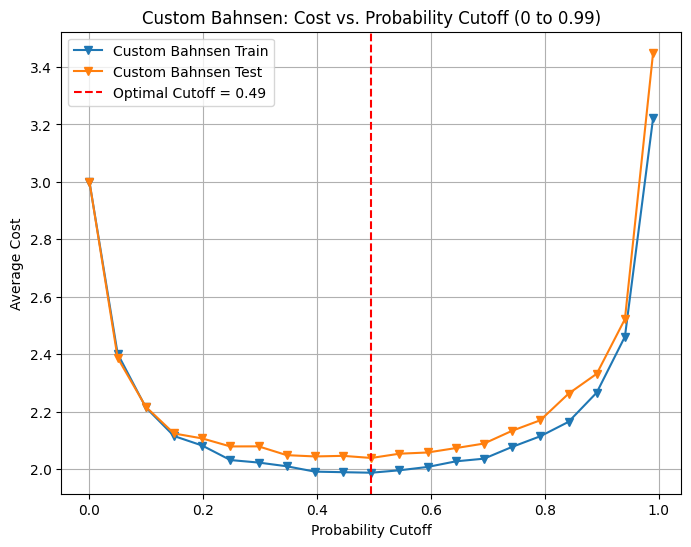

In [ ]:
# =============================================================================
# Cell 4: Custom Bahnsen Cost-Sensitive Classifier with Two Threshold Evaluations - Average Costs
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.base import BaseEstimator, ClassifierMixin

# Define the custom Bahnsen cost-sensitive classifier
class BahnsenCostSensitiveClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=0.01, epochs=2000, cost_tp=3.0, cost_fp=3.0, cost_tn=0.0):
        self.alpha = alpha
        self.epochs = epochs
        self.cost_tp = cost_tp
        self.cost_fp = cost_fp
        self.cost_tn = cost_tn

    def _cost_and_grad(self, X, y, cost_fn, w, b):
        N = X.shape[0]
        z = X.dot(w) + b
        h = expit(z)
        cost_i = y * (h * self.cost_tp + (1 - h) * cost_fn) + (1 - y) * (h * self.cost_fp + (1 - h) * self.cost_tn)
        cost_value = np.mean(cost_i)
        factor = (y * (self.cost_tp - cost_fn) + (1 - y) * (self.cost_fp - self.cost_tn)) * h * (1 - h)
        grad_w = (X.T.dot(factor)) / N
        grad_b = np.mean(factor)
        return cost_value, grad_w, grad_b

    def fit(self, X, y, cost_fn):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=int)
        cost_fn = np.array(cost_fn, dtype=float)
        n_features = X.shape[1]
        self.w_ = np.zeros(n_features)
        self.b_ = 0.0
        for epoch in range(self.epochs):
            cost_value, grad_w, grad_b = self._cost_and_grad(X, y, cost_fn, self.w_, self.b_)
            self.w_ -= self.alpha * grad_w
            self.b_ -= self.alpha * grad_b
        return self

    def predict_proba(self, X):
        X = np.array(X, dtype=float)
        z = X.dot(self.w_) + self.b_
        p1 = expit(z)
        p0 = 1 - p1
        return np.vstack((p0, p1)).T

    def predict(self, X, threshold):
        probs = self.predict_proba(X)[:, 1]
        return (probs >= threshold).astype(int)

# Train the custom classifier (using original features)
model_custom = BahnsenCostSensitiveClassifier(alpha=0.01, epochs=2000, cost_tp=3, cost_fp=3, cost_tn=0)
model_custom.fit(X_train, y_train, FNC_train)



# ----------------------------
# Evaluation 1: Using thresholds from 0 to 1
# ----------------------------
thresholds_full = np.linspace(0, 1, 21)
print("==== Custom Bahnsen Average Costs (Thresholds 0 to 1) ====")
custom_train_costs_full = []
custom_test_costs_full = []
for cutoff in thresholds_full:
    y_train_pred = (model_custom.predict_proba(X_train)[:, 1] >= cutoff).astype(int)
    y_test_pred  = (model_custom.predict_proba(X_test)[:, 1] >= cutoff).astype(int)
    cost_train = total_cost(y_train, y_train_pred, FNC_train) / len(y_train)
    cost_test  = total_cost(y_test, y_test_pred, FNC_test) / len(y_test)
    custom_train_costs_full.append(cost_train)
    custom_test_costs_full.append(cost_test)
    print(f"Cutoff={cutoff:.2f} | Avg Train Cost={cost_train:.4f} | Avg Test Cost={cost_test:.4f}")

# Find optimal threshold based on minimum test cost
min_index_full = np.argmin(custom_test_costs_full)
optimal_cutoff_full = thresholds_full[min_index_full]
optimal_train_cost_full = custom_train_costs_full[min_index_full]
optimal_test_cost_full = custom_test_costs_full[min_index_full]
print(f"\n>>> Optimal Threshold (0 to 1): {optimal_cutoff_full:.2f} | "
      f"Train Cost: {optimal_train_cost_full:.4f} | Test Cost: {optimal_test_cost_full:.4f}")


plt.figure(figsize=(8,6))
plt.plot(thresholds_full, custom_train_costs_full, label='Custom Bahnsen Train', marker='v')
plt.plot(thresholds_full, custom_test_costs_full, label='Custom Bahnsen Test', marker='v')
plt.axvline(optimal_cutoff_full, color='red', linestyle='--', label=f'Optimal Cutoff = {optimal_cutoff_full:.2f}')
plt.xlabel("Probability Cutoff")
plt.ylabel("Average Cost")
plt.title("Custom Bahnsen: Cost vs. Probability Cutoff (0 to 1)")
plt.legend()
plt.grid(True)
plt.show()


# ----------------------------
# Evaluation 2: Using thresholds from 0 to 0.99
# ----------------------------
thresholds_limited = np.linspace(0, 0.99, 21)
print("\n==== Custom Bahnsen Average Costs (Thresholds 0 to 0.99) ====")
custom_train_costs_limited = []
custom_test_costs_limited = []
for cutoff in thresholds_limited:
    y_train_pred = (model_custom.predict_proba(X_train)[:, 1] >= cutoff).astype(int)
    y_test_pred  = (model_custom.predict_proba(X_test)[:, 1] >= cutoff).astype(int)
    cost_train = total_cost(y_train, y_train_pred, FNC_train) / len(y_train)
    cost_test  = total_cost(y_test, y_test_pred, FNC_test) / len(y_test)
    custom_train_costs_limited.append(cost_train)
    custom_test_costs_limited.append(cost_test)
    print(f"Cutoff={cutoff:.2f} | Avg Train Cost={cost_train:.4f} | Avg Test Cost={cost_test:.4f}")

# Find optimal threshold based on minimum test cost
min_index_limited = np.argmin(custom_test_costs_limited)
optimal_cutoff_limited = thresholds_limited[min_index_limited]
optimal_train_cost_limited = custom_train_costs_limited[min_index_limited]
optimal_test_cost_limited = custom_test_costs_limited[min_index_limited]
print(f"\n>>> Optimal Threshold (0 to 0.99): {optimal_cutoff_limited:.2f} | "
      f"Train Cost: {optimal_train_cost_limited:.4f} | Test Cost: {optimal_test_cost_limited:.4f}")


plt.figure(figsize=(8,6))
plt.plot(thresholds_limited, custom_train_costs_limited, label='Custom Bahnsen Train', marker='v')
plt.plot(thresholds_limited, custom_test_costs_limited, label='Custom Bahnsen Test', marker='v')
plt.axvline(optimal_cutoff_limited, color='red', linestyle='--', label=f'Optimal Cutoff = {optimal_cutoff_limited:.2f}')
plt.xlabel("Probability Cutoff")
plt.ylabel("Average Cost")
plt.title("Custom Bahnsen: Cost vs. Probability Cutoff (0 to 0.99)")
plt.legend()
plt.grid(True)
plt.show()

### GA_1-Based Bahnsen Cost-Sensitive Logistic Regression

This cell implements a **genetic algorithm (GA)** version of Bahnsen's cost-sensitive logistic regression. Unlike gradient-based approaches, this uses an evolutionary process to **optimize model parameters** based on a cost-sensitive objective.

####  Model Overview:

- Implements `BahnsenCostSensitiveGAClassifier`:
  - Trains a logistic regression model using a **Genetic Algorithm**:
    - Population-based search (default size = 30)
    - Evolution over multiple generations (default = 100)
    - Includes crossover and mutation mechanisms
  - Cost function is derived from Bahnsen et al. and uses instance-level False Negative Costs.

####  Bahnsen Cost Function:

$$
\text{Cost} = \frac{1}{n} \sum_{i=1}^n \left(
y_i \left( \hat{p}_i \cdot \text{TPC} + (1 - \hat{p}_i) \cdot \text{FNC}_i \right) +
(1 - y_i) \left( \hat{p}_i \cdot \text{FPC} + (1 - \hat{p}_i) \cdot \text{TNC} \right)
\right)
$$

Where:
- $y_i$ is the true label for instance $i$  
- $\hat{p}_i = \sigma(\boldsymbol{x}_i^\top \boldsymbol{\theta})$ is the predicted probability  
- TPC = 3, FPC = 3, TNC = 0, FNC = instance-specific

####  Training:
- Model learns weights $\boldsymbol{w}$ and bias $b$ through genetic evolution
- Best solution is chosen based on minimum cost over training data

####  Evaluation:
- Evaluates average train and test costs across thresholds $t \in [0.00, 0.99]$
- Uses the `compute_example_dependent_cost()` function to calculate actual classification costs

####  Visualization:
- Plots **Average Cost vs. Probability Cutoff** for both train and test datasets
- Useful for identifying the optimal threshold that minimizes misclassification cost

This approach is especially useful when the cost surface is complex or non-differentiable, making traditional optimization methods less effective.


Generation 0, Best Cost=13.1146
Generation 10, Best Cost=3.7780
Generation 20, Best Cost=2.9328
Generation 30, Best Cost=2.5919
Generation 40, Best Cost=2.3733
Generation 50, Best Cost=2.2521
Generation 60, Best Cost=2.1853
Generation 70, Best Cost=2.1371
Generation 80, Best Cost=2.1068
Generation 90, Best Cost=2.0831
==== Bahnsen GA Cost-Sensitive Logistic Regression Average Costs ====
Cutoff=0.00 | Avg Train Cost=3.0000 | Avg Test Cost=3.0000
Cutoff=0.02 | Avg Train Cost=2.3268 | Avg Test Cost=2.3082
Cutoff=0.04 | Avg Train Cost=2.1942 | Avg Test Cost=2.1918
Cutoff=0.06 | Avg Train Cost=2.1506 | Avg Test Cost=2.1562
Cutoff=0.08 | Avg Train Cost=2.1134 | Avg Test Cost=2.1236
Cutoff=0.10 | Avg Train Cost=2.0740 | Avg Test Cost=2.0899
Cutoff=0.12 | Avg Train Cost=2.0598 | Avg Test Cost=2.0797
Cutoff=0.14 | Avg Train Cost=2.0466 | Avg Test Cost=2.0929
Cutoff=0.16 | Avg Train Cost=2.0430 | Avg Test Cost=2.0916
Cutoff=0.18 | Avg Train Cost=2.0406 | Avg Test Cost=2.0891
Cutoff=0.20 | Avg Tr

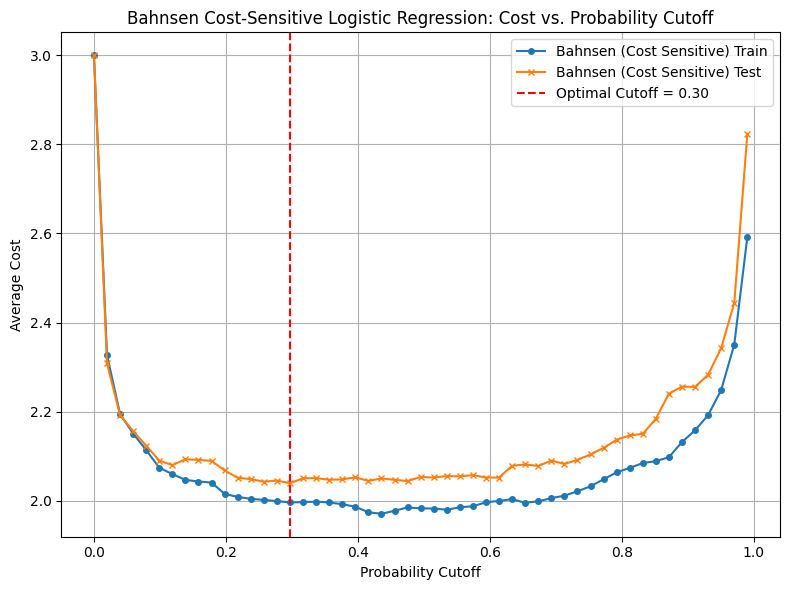

In [2]:
# =============================================================================
# Cell 5: Bahnsen Cost-Sensitive Logistic Regression (Genetic Algo 1)
# =============================================================================
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.base import BaseEstimator, ClassifierMixin
random.seed(21)
np.random.seed(21)

# Helper function: Compute example-dependent average cost
def compute_example_dependent_cost(y_true, y_pred, cost_fn_values, cost_tp=3, cost_fp=3, cost_tn=0):
    """
    Computes the average cost for predictions y_pred vs. y_true,
    using example-dependent false negative cost = cost_fn_values[i].
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    cost_fn_values = np.array(cost_fn_values)

    tp_mask = (y_true == 1) & (y_pred == 1)
    fp_mask = (y_true == 0) & (y_pred == 1)
    fn_mask = (y_true == 1) & (y_pred == 0)
    tn_mask = (y_true == 0) & (y_pred == 0)

    total_cost_val = (np.sum(tp_mask * cost_tp) +
                      np.sum(fp_mask * cost_fp) +
                      np.sum(fn_mask * cost_fn_values) +
                      np.sum(tn_mask * cost_tn))
    avg_cost = total_cost_val / len(y_true)
    return avg_cost

# Define the GA-based Bahnsen cost-sensitive classifier
class BahnsenCostSensitiveGAClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, population_size=30, generations=100, mutation_rate=0.1,
                 cost_tp=3.0, cost_fp=3.0, cost_tn=0.0):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.cost_tp = cost_tp
        self.cost_fp = cost_fp
        self.cost_tn = cost_tn

    def _bahnsen_cost(self, X, y, cost_fn, w, b):
        z = X.dot(w) + b
        h = expit(z)
        cost_i = y * (h * self.cost_tp + (1 - h) * cost_fn) + (1 - y) * (h * self.cost_fp + (1 - h) * self.cost_tn)
        return np.mean(cost_i)

    def _initialize_population(self, n_features):
        return [np.random.uniform(-1, 1, size=n_features + 1) for _ in range(self.population_size)]

    def _selection(self, population, fitnesses, k=5):
        selected = []
        for _ in range(len(population)):
            candidates = random.sample(list(zip(population, fitnesses)), k)
            winner = min(candidates, key=lambda x: x[1])
            selected.append(winner[0])
        return selected

    def _crossover(self, parent1, parent2):
        child = np.copy(parent1)
        mask = np.random.rand(len(parent1)) > 0.5
        child[mask] = parent2[mask]
        return child

    def _mutate(self, chromosome):
        for i in range(len(chromosome)):
            if random.random() < self.mutation_rate:
                chromosome[i] += np.random.normal(0, 0.1)
        return chromosome

    def fit(self, X, y, cost_fn):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=int)
        cost_fn = np.array(cost_fn, dtype=float)
        n_features = X.shape[1]

        population = self._initialize_population(n_features)

        for generation in range(self.generations):
            fitnesses = [self._bahnsen_cost(X, y, cost_fn, chromo[:-1], chromo[-1])
                         for chromo in population]
            population = self._selection(population, fitnesses)
            next_gen = []
            for i in range(0, len(population), 2):
                parent1 = population[i]
                parent2 = population[(i + 1) % len(population)]
                child1 = self._crossover(parent1, parent2)
                child2 = self._crossover(parent2, parent1)
                next_gen.extend([self._mutate(child1), self._mutate(child2)])
            population = next_gen[:self.population_size]

            if generation % 10 == 0:
                print(f"Generation {generation}, Best Cost={min(fitnesses):.4f}")

        best_idx = np.argmin(fitnesses)
        best_chromo = population[best_idx]
        self.w_ = best_chromo[:-1]
        self.b_ = best_chromo[-1]
        return self

    def predict_proba(self, X):
        X = np.array(X, dtype=float)
        z = X.dot(self.w_) + self.b_
        p1 = expit(z)
        p0 = 1 - p1
        return np.vstack((p0, p1)).T

    def predict(self, X, threshold):
        probs = self.predict_proba(X)[:, 1]
        return (probs >= threshold).astype(int)

# ----------------------------------------------------------------------
# Train the GA-based classifier on the training data
# ----------------------------------------------------------------------
bahnsen_ga_clf = BahnsenCostSensitiveGAClassifier(
    population_size=40,
    generations=100,
    mutation_rate=0.1,
    cost_tp=3,
    cost_fp=3,
    cost_tn=0
)
bahnsen_ga_clf.fit(X_train, y_train, FNC_train)

# ----------------------------------------------------------------------
# Evaluate over a range of probability cutoffs
# ----------------------------------------------------------------------
offsets = np.linspace(0, 0.99, 51)
ga_train_costs = []
ga_test_costs = []

ga_train_probs = bahnsen_ga_clf.predict_proba(X_train)[:, 1]
ga_test_probs = bahnsen_ga_clf.predict_proba(X_test)[:, 1]

print("==== Bahnsen GA Cost-Sensitive Logistic Regression Average Costs ====")
for cutoff in offsets:
    y_train_pred = (ga_train_probs >= cutoff).astype(int)
    y_test_pred = (ga_test_probs >= cutoff).astype(int)
    cost_train = compute_example_dependent_cost(y_train, y_train_pred, FNC_train, cost_tp=3, cost_fp=3, cost_tn=0)
    cost_test = compute_example_dependent_cost(y_test, y_test_pred, FNC_test, cost_tp=3, cost_fp=3, cost_tn=0)
    ga_train_costs.append(cost_train)
    ga_test_costs.append(cost_test)
    print(f"Cutoff={cutoff:.2f} | Avg Train Cost={cost_train:.4f} | Avg Test Cost={cost_test:.4f}")


# ----------------------------------------------------------------------
# Find and print the optimal cutoff with corresponding costs
# ----------------------------------------------------------------------
optimal_idx = np.argmin(ga_test_costs)
optimal_cutoff = offsets[optimal_idx]
optimal_train_cost = ga_train_costs[optimal_idx]
optimal_test_cost = ga_test_costs[optimal_idx]

print(f"\n>>> Optimal Threshold: {optimal_cutoff:.2f} | "
      f"Train Cost: {optimal_train_cost:.4f} | Test Cost: {optimal_test_cost:.4f}")

# ----------------------------------------------------------------------
# Plot average cost vs. probability cutoff with red line
# ----------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.plot(offsets, ga_train_costs, label='Bahnsen (Cost Sensitive) Train', linestyle='-', marker='o', markersize=4)
plt.plot(offsets, ga_test_costs, label='Bahnsen (Cost Sensitive) Test', linestyle='-', marker='x', markersize=4)

# Add vertical line at optimal cutoff
plt.axvline(optimal_cutoff, color='red', linestyle='--', label=f'Optimal Cutoff = {optimal_cutoff:.2f}')

plt.title("Bahnsen Cost-Sensitive Logistic Regression: Cost vs. Probability Cutoff")
plt.xlabel("Probability Cutoff")
plt.ylabel("Average Cost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##  Bahnsen Cost-Sensitive Logistic Regression (Genetic Algorithm 2)

This cell implements a **Genetic Algorithm 2 (GA)** version of **Bahnsen's cost-sensitive logistic regression**. Unlike traditional gradient-based methods, this approach uses an evolutionary optimization strategy to minimize a cost-sensitive objective tailored to example-dependent misclassification costs.

---

###  Model Overview

**Classifier**: `BahnsenCostSensitiveGAClassifier`  
A cost-sensitive logistic regression model trained using a Genetic Algorithm.

**Key Features:**
- Population-based optimization (`population_size=50` by default)
- Evolution over multiple generations (`generations=100`)
- Includes **elitism**, **tournament selection**, **uniform crossover**, and **adaptive mutation**
- Uses the **Bahnsen cost function** with instance-level false negative costs (`FNC`)

---

### Bahnsen Cost Function

$$
\text{Cost} = \frac{1}{n} \sum_{i=1}^{n} \left[ y_i (\hat{p}_i \cdot \text{TPC} + (1 - \hat{p}_i) \cdot \text{FNC}_i) + (1 - y_i)(\hat{p}_i \cdot \text{FPC} + (1 - \hat{p}_i) \cdot \text{TNC}) \right]
$$


Where:  
- $y_i$: true label for instance $i$  
- $\hat{p}_i = \sigma(x_i^\top w + b)$: predicted probability using the sigmoid function  
- TPC = 3 (True Positive Cost)  
- FPC = 3 (False Positive Cost)  
- TNC = 0 (True Negative Cost)  
- $\text{FNC}_i$: instance-specific False Negative Cost

---

### Training

- Learns weight vector $w$ and bias $b$ through GA-based evolution.
- At each generation:
  - Fitness is measured by average Bahnsen cost.
  - A new generation is formed through selection, crossover, and mutation.
- The best individual (chromosome) is selected based on **minimum training cost**.

---

### Evaluation

- Predicts probabilities on train and test sets.
- Evaluates classification **costs across thresholds** $t \in [0.00, 0.99]$
- Uses `compute_example_dependent_cost()` to compute actual cost based on thresholded predictions.
- Identifies the **optimal threshold** that minimizes test cost.

---

### Visualization

- **Plots average cost vs. probability cutoff** for both training and test data.
- Highlights the **optimal cutoff** using a red dashed line.
- Helps in selecting a threshold that minimizes **overall classification cost**, especially important when false negatives have varying costs.


Generation 0, Best Cost=18.2094
Generation 10, Best Cost=3.6327
Generation 20, Best Cost=3.0431
Generation 30, Best Cost=2.6835
Generation 40, Best Cost=2.5142
Generation 50, Best Cost=2.4105
Generation 60, Best Cost=2.3399
Generation 70, Best Cost=2.3084
Generation 80, Best Cost=2.2742
Generation 90, Best Cost=2.2535
==== Bahnsen GA Cost-Sensitive Logistic Regression Average Costs ====
Cutoff=0.00 | Avg Train Cost=3.0000 | Avg Test Cost=3.0000
Cutoff=0.02 | Avg Train Cost=2.8991 | Avg Test Cost=2.8983
Cutoff=0.04 | Avg Train Cost=2.6586 | Avg Test Cost=2.6534
Cutoff=0.06 | Avg Train Cost=2.5237 | Avg Test Cost=2.5089
Cutoff=0.08 | Avg Train Cost=2.4053 | Avg Test Cost=2.3911
Cutoff=0.10 | Avg Train Cost=2.3520 | Avg Test Cost=2.3421
Cutoff=0.12 | Avg Train Cost=2.2670 | Avg Test Cost=2.2643
Cutoff=0.14 | Avg Train Cost=2.2310 | Avg Test Cost=2.2319
Cutoff=0.16 | Avg Train Cost=2.2029 | Avg Test Cost=2.2034
Cutoff=0.18 | Avg Train Cost=2.1531 | Avg Test Cost=2.1613
Cutoff=0.20 | Avg Tr

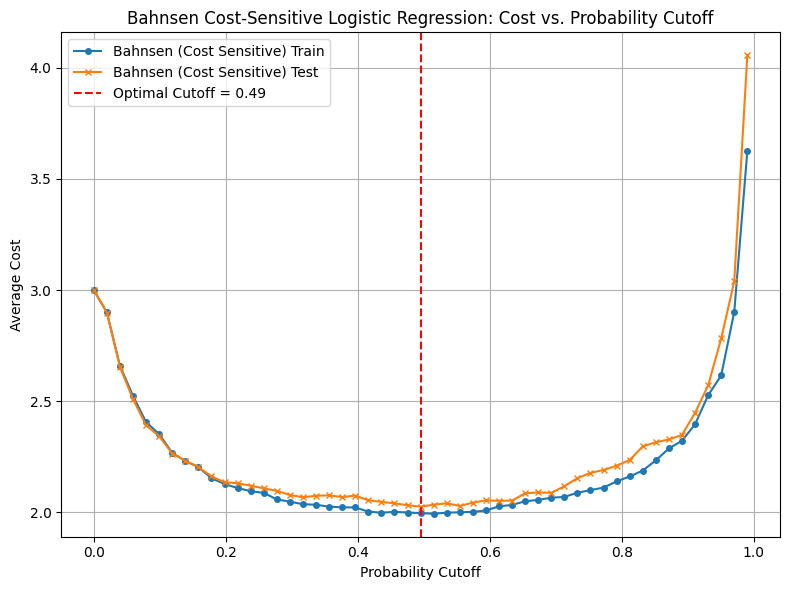

In [ ]:
# =============================================================================
# Cell 5: Bahnsen Cost-Sensitive Logistic Regression (Genetic Algo 2)
# =============================================================================
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.base import BaseEstimator, ClassifierMixin
random.seed(12345)
np.random.seed(12345)

# Helper function: Compute example-dependent average cost
def compute_example_dependent_cost(y_true, y_pred, cost_fn_values, cost_tp=3, cost_fp=3, cost_tn=0):
    """
    Computes the average cost for predictions y_pred vs. y_true,
    using example-dependent false negative cost = cost_fn_values[i].
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    cost_fn_values = np.array(cost_fn_values)

    tp_mask = (y_true == 1) & (y_pred == 1)
    fp_mask = (y_true == 0) & (y_pred == 1)
    fn_mask = (y_true == 1) & (y_pred == 0)
    tn_mask = (y_true == 0) & (y_pred == 0)

    total_cost_val = (np.sum(tp_mask * cost_tp) +
                      np.sum(fp_mask * cost_fp) +
                      np.sum(fn_mask * cost_fn_values) +
                      np.sum(tn_mask * cost_tn))
    avg_cost = total_cost_val / len(y_true)
    return avg_cost


class BahnsenCostSensitiveGAClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, population_size=30, generations=100, mutation_rate=0.1,
                 cost_tp=3.0, cost_fp=3.0, cost_tn=0.0, elitism_ratio=0.1):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.cost_tp = cost_tp
        self.cost_fp = cost_fp
        self.cost_tn = cost_tn
        self.elitism_ratio = elitism_ratio  # Keep top X% of the population

    def _bahnsen_cost(self, X, y, cost_fn, w, b):
        z = X.dot(w) + b
        h = expit(z)
        cost_i = y * (h * self.cost_tp + (1 - h) * cost_fn) + (1 - y) * (h * self.cost_fp + (1 - h) * self.cost_tn)
        return np.mean(cost_i)

    def _initialize_population(self, n_features):
        return [np.random.uniform(-1, 1, size=n_features + 1) for _ in range(self.population_size)]

    def _evaluate_fitness(self, X, y, cost_fn, population):
        return [self._bahnsen_cost(X, y, cost_fn, chromo[:-1], chromo[-1]) for chromo in population]

    def _elitism(self, population, fitnesses):
        n_elites = int(self.elitism_ratio * len(population))
        elite_indices = np.argsort(fitnesses)[:n_elites]
        return [population[i] for i in elite_indices]

    def _tournament_selection(self, population, fitnesses, k=3):
        selected = []
        for _ in range(len(population)):
            idxs = np.random.choice(len(population), size=k, replace=False)
            best_idx = idxs[np.argmin([fitnesses[i] for i in idxs])]
            selected.append(population[best_idx])
        return selected

    def _uniform_crossover(self, parent1, parent2):
        return np.where(np.random.rand(len(parent1)) < 0.5, parent1, parent2)

    def _adaptive_mutate(self, chromosome, generation):
        decay = 0.99 ** generation
        for i in range(len(chromosome)):
            if random.random() < self.mutation_rate * decay:
                chromosome[i] += np.random.normal(0, 0.1 * decay)
        return chromosome

    def fit(self, X, y, cost_fn):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=int)
        cost_fn = np.array(cost_fn, dtype=float)
        n_features = X.shape[1]

        population = self._initialize_population(n_features)

        for generation in range(self.generations):
            fitnesses = self._evaluate_fitness(X, y, cost_fn, population)
            elites = self._elitism(population, fitnesses)
            selected = self._tournament_selection(population, fitnesses)

            next_gen = elites.copy()
            while len(next_gen) < self.population_size:
                p1, p2 = random.sample(selected, 2)
                child = self._uniform_crossover(p1, p2)
                child = self._adaptive_mutate(child, generation)
                next_gen.append(child)

            population = next_gen[:self.population_size]

            if generation % 10 == 0:
                print(f"Generation {generation}, Best Cost={min(fitnesses):.4f}")

        best_idx = np.argmin(self._evaluate_fitness(X, y, cost_fn, population))
        best_chromo = population[best_idx]
        self.w_ = best_chromo[:-1]
        self.b_ = best_chromo[-1]
        return self

    def predict_proba(self, X):
        X = np.array(X, dtype=float)
        z = X.dot(self.w_) + self.b_
        p1 = expit(z)
        p0 = 1 - p1
        return np.vstack((p0, p1)).T

    def predict(self, X, threshold):
        probs = self.predict_proba(X)[:, 1]
        return (probs >= threshold).astype(int)

# ----------------------------------------------------------------------
# Train the GA-based classifier on the training data
# ----------------------------------------------------------------------
bahnsen_ga_clf = BahnsenCostSensitiveGAClassifier(
    population_size=50,
    generations=100,
    mutation_rate=0.1,
    cost_tp=3,
    cost_fp=3,
    cost_tn=0
)
bahnsen_ga_clf.fit(X_train, y_train, FNC_train)

# ----------------------------------------------------------------------
# Evaluate over a range of probability cutoffs
# ----------------------------------------------------------------------
offsets = np.linspace(0, 0.99, 51)
ga_train_costs = []
ga_test_costs = []

ga_train_probs = bahnsen_ga_clf.predict_proba(X_train)[:, 1]
ga_test_probs = bahnsen_ga_clf.predict_proba(X_test)[:, 1]

print("==== Bahnsen GA Cost-Sensitive Logistic Regression Average Costs ====")
for cutoff in offsets:
    y_train_pred = (ga_train_probs >= cutoff).astype(int)
    y_test_pred = (ga_test_probs >= cutoff).astype(int)
    cost_train = compute_example_dependent_cost(y_train, y_train_pred, FNC_train, cost_tp=3, cost_fp=3, cost_tn=0)
    cost_test = compute_example_dependent_cost(y_test, y_test_pred, FNC_test, cost_tp=3, cost_fp=3, cost_tn=0)
    ga_train_costs.append(cost_train)
    ga_test_costs.append(cost_test)
    print(f"Cutoff={cutoff:.2f} | Avg Train Cost={cost_train:.4f} | Avg Test Cost={cost_test:.4f}")


# ----------------------------------------------------------------------
# Find and print the optimal cutoff with corresponding costs
# ----------------------------------------------------------------------
optimal_idx = np.argmin(ga_test_costs)
optimal_cutoff = offsets[optimal_idx]
optimal_train_cost = ga_train_costs[optimal_idx]
optimal_test_cost = ga_test_costs[optimal_idx]

print(f"\n>>> Optimal Threshold: {optimal_cutoff:.2f} | "
      f"Train Cost: {optimal_train_cost:.4f} | Test Cost: {optimal_test_cost:.4f}")

# ----------------------------------------------------------------------
# Plot average cost vs. probability cutoff with red line
# ----------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.plot(offsets, ga_train_costs, label='Bahnsen (Cost Sensitive) Train', linestyle='-', marker='o', markersize=4)
plt.plot(offsets, ga_test_costs, label='Bahnsen (Cost Sensitive) Test', linestyle='-', marker='x', markersize=4)

# Add vertical line at optimal cutoff
plt.axvline(optimal_cutoff, color='red', linestyle='--', label=f'Optimal Cutoff = {optimal_cutoff:.2f}')

plt.title("Bahnsen Cost-Sensitive Logistic Regression: Cost vs. Probability Cutoff")
plt.xlabel("Probability Cutoff")
plt.ylabel("Average Cost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
